In [30]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

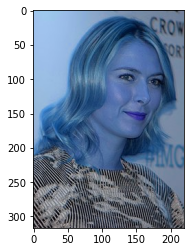

In [31]:
img=cv2.imread('../input/test-images/sharapova.jpg')
img.shape
plt.imshow(img)

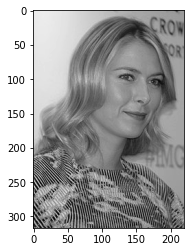

In [32]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

plt.imshow(gray,cmap='gray')

In [33]:
gray

array([[204, 205, 205, ..., 135, 134, 134],
       [204, 205, 205, ..., 133, 133, 133],
       [204, 205, 205, ..., 134, 133, 133],
       ...,
       [ 76,  57,  11, ...,  64, 105, 113],
       [ 92, 112,  35, ...,  69, 110, 109],
       [ 37, 128, 115, ...,  92, 112,  90]], dtype=uint8)

In [34]:
img

array([[[158, 197, 236],
        [159, 198, 237],
        [159, 198, 237],
        ...,
        [116, 128, 156],
        [115, 126, 156],
        [113, 127, 156]],

       [[158, 197, 236],
        [159, 198, 237],
        [159, 198, 237],
        ...,
        [114, 126, 154],
        [114, 125, 155],
        [112, 126, 155]],

       [[158, 197, 236],
        [159, 198, 237],
        [159, 198, 237],
        ...,
        [115, 127, 155],
        [114, 125, 155],
        [112, 126, 155]],

       ...,

       [[ 78,  74,  79],
        [ 59,  55,  60],
        [ 13,   9,  14],
        ...,
        [ 66,  62,  67],
        [109, 103, 108],
        [118, 111, 116]],

       [[ 94,  90,  95],
        [114, 110, 115],
        [ 37,  33,  38],
        ...,
        [ 71,  67,  72],
        [114, 108, 113],
        [113, 107, 112]],

       [[ 41,  35,  40],
        [132, 126, 131],
        [119, 113, 118],
        ...,
        [ 94,  90,  95],
        [114, 110, 115],
        [ 92,  88,  93]]

In [35]:
face_cascade= cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 99,  58, 116, 116]], dtype=int32)

In [36]:
(x,y,w,h)=faces[0]
x,y,w,h

(99, 58, 116, 116)

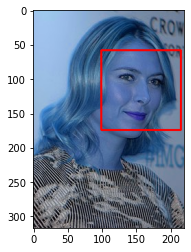

In [37]:
face_plot=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_plot)

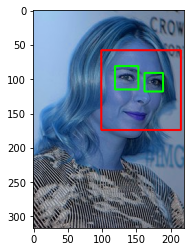

In [38]:
#cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_plot = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= face_plot[y:y+h, x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_plot,cmap='gray')
plt.show()
    
     

In [39]:
help(matplotlib.pyplot.figure)


Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure, or activate an existing figure.
    
    Parameters
    ----------
    num : int or str or `.Figure`, optional
        A unique identifier for the figure.
    
        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string refers to the figure label.
    
        If there is no figure with the identifier or *num* is not given, a new
        figure is created, made active and returned.  If *num* is an int, it
        will be used for the ``Figure.number`` attribute, otherwise, an
        auto-generated integer value is used (starting at 1 and incremented
        for each new figure). If *num* is a string, the figure label and the
        wind